In [35]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx



import sklearn.model_selection as sklm


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl





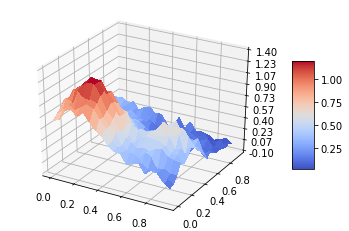

In [36]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
#x           = np.linspace(0, 1, n_x)
#y           = np.linspace(0, 1, n_x)
x           = np.arange(0, 1, 0.05)
y           = np.arange(0, 1, 0.05)


x, y        = np.meshgrid(x,y)
noise_level = 0.05


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


## oppgave 1 
standard ols.
confidence intervals for beta by computing their variances.
evaluate MSE and R2.

In [37]:


#x           = np.linspace(0, 1, n_x)
#y           = np.linspace(0, 1, n_x)

x           = np.arange(0, 1, 0.05)
y           = np.arange(0, 1, 0.05)


maxpower = 5
beta_result = np.array([1,1])
pred_result = np.array([1,1])

mse_ols=np.empty([maxpower])
r2_ols=np.empty([maxpower])
mse_ols_scikit=np.empty([maxpower])
r2_ols_scikit=np.empty([maxpower])


for i in range(maxpower):

    design      = fx.DesignDesign(x,y,i+1)
    beta_ols, frank_pred_ols  = fx.OridinaryLeastSquares(design,np.ravel(frank),design)
    #beta_result = np.stack(beta_result,beta_ols)
    #pred_result = np.stack(pred_result,frank_pred_ols)
    
    mse_ols[i] = fx.MSE(np.ravel(frank),frank_pred_ols)
    r2_ols[i] = fx.R2Score(np.ravel(frank),frank_pred_ols)
    
    confidence = fx.confidence_interval(design,noise_level,0.95)
    
    mse_ols_scikit[i] = mean_squared_error(np.ravel(frank),frank_pred_ols)
    r2_ols_scikit[i] = r2_score(np.ravel(frank),frank_pred_ols)
    
    

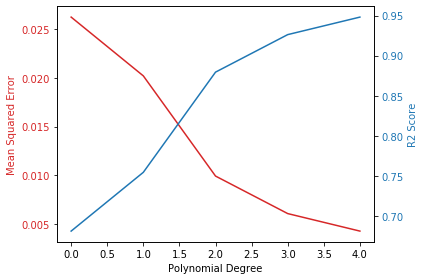

In [38]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

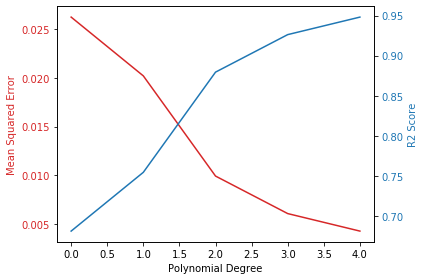

In [39]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols_scikit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols_scikit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

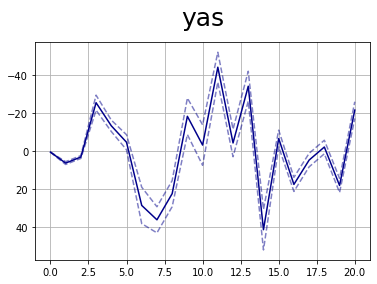

In [40]:



plt.plot(beta_ols - confidence, linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols+confidence, linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols, c='darkblue')
plt.gca().invert_yaxis()
plt.title('yas', fontsize=25, y=1.05)
plt.grid()
plt.show()


# oppgave B

In [43]:
design_train, design_test, y_train, y_test = train_test_split(design, np.ravel(frank), test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(design_train.T.dot(design_train)).dot(design_train.T).dot(y_train)


# and then make the prediction

prediction = design_test @ beta



print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test MSE")
print(fx.MSE(y_test,prediction))

# Tester med Scikit Learn


print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction))           
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction))

Test R2
0.9324835798342932
Test MSE
0.005081323735075341
Test R2- Scikit Learn
0.9324835798342932
Test MSE- Scikit Learn
0.005081323735075341


In [44]:
maxpower = 13
r2=np.zeros(maxpower)
r2_in=np.zeros(maxpower)
mse=np.zeros(maxpower)
mse_in=np.zeros(maxpower)
bias =np.zeros(maxpower)
variance=np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2[i], mse[i], r2_in[i], mse_in[i], bias[i], variance[i] = fx.k_fold_cv(10, frank, design_matrix, fx.RidgeRegression,10e-05, shuffle=True)

    print((i+1)*100/maxpower)


7.6923076923076925
15.384615384615385
23.076923076923077
30.76923076923077
38.46153846153846
46.15384615384615
53.84615384615385
61.53846153846154
69.23076923076923
76.92307692307692
84.61538461538461
92.3076923076923
100.0


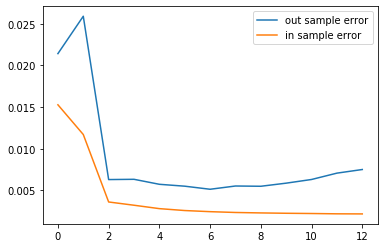

In [46]:
plt.plot(range(maxpower),mse, label='out sample error')
plt.plot(range(maxpower),mse_in, label='in sample error')
plt.legend()
plt.show()
